In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Предобработка

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Term-paper/data_by_district_raw.xlsx')
dff = pd.read_excel('/content/drive/MyDrive/Term-paper/2019_districts_columns.xlsx')

In [ ]:
df.rename(columns = {'Unnamed: 0' : 'District'}, inplace = True)
df.rename(columns = {'Turnout_neighborhood' : 'Turnout_district'}, inplace = True)
df.rename(columns = {'UG_neighborhood' : 'UG_district'}, inplace = True)

dff['Party'][dff['Supported_by'] == 'United Russia, A Just Russia, City Hall'] = 'United Russia'
dff['Party'][dff['Supported_by'] == 'United Russia'] = 'United Russia'
dff['Party'][dff['Supported_by'] == '«United Russia»'] = 'United Russia'

party_dict = dict(zip(dff.Candidate, dff.Party))

In [ ]:
candidates = df[['District', 'candidate_1', 'candidate_2', 'candidate_3', 'candidate_4', 'candidate_5', 'candidate_6']]

district_winners={}
district_winners_shares={}

for i in range(len(candidates['candidate_1'])):
    if type(candidates['candidate_1'][i]) == str:
        cand1 = candidates['candidate_1'][i]
        cand2 = candidates['candidate_2'][i]
        cand3 = candidates['candidate_3'][i]
        cand4 = candidates['candidate_4'][i]
        cand5 = candidates['candidate_5'][i]
        cand6 = candidates['candidate_6'][i]
    else:
        vote1 = candidates['candidate_1'][i]
        vote2 = candidates['candidate_2'][i]
        vote3 = candidates['candidate_3'][i]
        vote4 = candidates['candidate_4'][i]
        vote5 = candidates['candidate_5'][i]
        vote6 = candidates['candidate_6'][i]
        
        
        votesum = np.nansum(np.array([vote1, vote2, vote3, vote4, vote5, vote6]))

        maxvote = max(vote1, vote2, vote3, vote4, vote5, vote6)

        share = maxvote/votesum
        district_winners_shares[candidates['District'][i]] = share

        if maxvote==vote1:
            district_winners[candidates['District'][i]] = cand1
        elif maxvote==vote2:
            district_winners[candidates['District'][i]] = cand2
        elif maxvote==vote3:
            district_winners[candidates['District'][i]] = cand3
        elif maxvote==vote4:
            district_winners[candidates['District'][i]] = cand4
        elif maxvote==vote5:
            district_winners[candidates['District'][i]] = cand5
        elif maxvote==vote6:
            district_winners[candidates['District'][i]] = cand6

del district_winners['Сумма']

In [ ]:
df['district_winner'] = df['District'].map(district_winners)
df['Win_party_district'] = df['district_winner'].map(party_dict)
df['district_winner_share'] = df['District'].map(district_winners_shares)

In [ ]:
df = df.drop(df.columns[22:33], axis = 1)

In [ ]:
okrug_election_comission_dict = dict(zip(dff.Candidate, dff.okrug_election_comission))
UG_dict = dict(zip(dff.Candidate, dff.UG))

df['district_oec'] = df['district_winner'].map(okrug_election_comission_dict)
df['district_UG'] = df['district_winner'].map(UG_dict)

In [ ]:
df.drop(df.index[df['District'] == 'Сумма'], inplace = True)

## Данные "Механика Москвы"

In [ ]:
blag = pd.read_excel('/content/drive/MyDrive/Term-paper/Mx2_blagoustroistvo.xlsx').T
safety = pd.read_excel('/content/drive/MyDrive/Term-paper/Mx2_bezopasnost.xlsx').T
culture = pd.read_excel('/content/drive/MyDrive/Term-paper/Mx2_kultura.xlsx').T
education = pd.read_excel('/content/drive/MyDrive/Term-paper/Mx2_obrazovanie.xlsx').T

MX_slovar = pd.read_excel('/content/drive/MyDrive/Term-paper/MX_slovar.xlsx')
MX_dict = dict(zip(MX_slovar['name'], MX_slovar['tik']))

In [ ]:
def drop_rows(df):
    district_names_MX_set = set(pd.read_excel('/content/drive/MyDrive/Term-paper/MX_slovar.xlsx')['name'])
    df = df.reset_index()
    for i in range(len(df)):
        if df['index'][i] not in district_names_MX_set:
            df = df.drop(i, axis=0)
    return df

safety = drop_rows(safety)

In [ ]:
safety.rename(columns = {0 : 'sfmeasures_privateguard',
                         1 : 'sfmeasures_cameras',
                         2 : 'sfmeasures_barrier',
                         3 : 'sfmeasures_fence',
                         4 : 'sfmeasures_patrol',
                         5 : 'sfmeasures_concierge',
                         6 : 'sfmeasures_none',
                         7 : 'house_cameras',
                         8 : 'house_irondoors',
                         9 : 'house_doorlock',
                         10 : 'house_barrier',
                         11 : 'house_fence',
                         12 : 'house_concierge',
                         13 : 'house_none',
                         14 : 'afraid_thieft',
                         15 : 'afraid_burglary',
                         16 : 'afraid_carjack',
                         17 : 'afraid_mugging',
                         18 : 'afraid_defaceproperty_public',
                         19 : 'afraid_defaceproperty_private',
                         20 : 'afraid_assault',
                         21 : 'afraid_murder',
                         22 : 'afraid_rape',
                         23 : 'afraid_animals',
                         24 : 'afraid_agression_drunk',
                         25 : 'afraid_agression_young',
                         26 : 'afraid_agression_migrant',
                         27 : 'afraid_agression_police',
                         28 : 'issafe_walk_night',
                         29 : 'issafe_walk_day',
                         30 : 'neighbors_nobody',
                         31 : 'neighbors_know_face',
                         32 : 'neighbors_know_name',
                         33 : 'neighbors_talk',
                         34 : 'neighbors_spendtime',
                         35 : 'personal_unsafe_streets',
                         36 : 'personal_migrants'}, inplace = True)

safety['tik'] = safety['index'].map(MX_dict)

In [ ]:
blag = drop_rows(blag)
blag.rename(columns = {0 : 'blag_money',
                         1 : 'blag_safetysystem',
                         2 : 'blag_repair',
                         3 : 'blag_cleanup',
                         4 : 'blag_organise',
                         5 : 'blag_subbotnik',
                         6 : 'blag_nothing',
                         7 : 'problem_coldwater',
                         8 : 'problem_hotwater',
                         9 : 'problem_water',
                         10 : 'problem_electricity',
                         11 : 'problem_lowheat',
                         12 : 'problem_highheat',
                         13 : 'problem_sewage',
                         14 : 'problem_wiring',
                         15 : 'problem_none',
                         16 : 'problem_dirty',
                         17 : 'problem_walls',
                         18 : 'problem_dark',
                         19 : 'problem_mice',
                         20 : 'problem_insects',
                         21 : 'problem_chute',
                         22 : 'problem_elevator',
                         23 : 'problem_drunk',
                         24 : 'problem_homeless',
                         25 : 'problem_migrants',
                         26 : 'problem_nothing',
                         27 : 'participate_money',
                         28 : 'participate_meeting',
                         29 : 'participate_initiative',
                         30 : 'participate_request',
                         31 : 'participate_track',
                         32 : 'participate_nothing',
                         33 : 'personal_low_betterment',
                         34 : 'personal_low_municipalservices',
                         35 : 'personal_dense_development',
                         36 : 'personal_hard_to_find_job',
                         37 : 'personal_expensive_living',
                         38 : 'personal_localauthorities_corruption'}, inplace = True)

blag['tik'] = blag['index'].map(MX_dict)

In [ ]:
education = drop_rows(education)
education.rename(columns = {0 : 'educ_extra_music',
                         1 : 'educ_extra_art',
                         2 : 'educ_extra_owndistrict',
                         3 : 'educ_extra_citycenter',
                         4 : 'educ_extra_none',
                         5 : 'educ_extra_otherdistricts',
                         6 : 'children_educextra_owndistrict',
                         7 : 'children_educextra_center',
                         8 : 'children_educextra_otherdistricts',
                         9 : 'satisfied_educ_preschool',
                         10 : 'satisfied_educ_school',
                         11 : 'satisfied_educ_extra',
                         12 : 'problem_education',
                         13 : 'problem_children_education',
                         14 : 'problem_education_level',
                         15 : 'problem_low_qualification',
                         16 : 'problem_children_injured',
                         17 : 'problem_russian_language_educ',
                         18 : 'problem_education_access',
                         19 : 'problem_education_timetable',
                         20 : 'problem_education_extrafees',
                         21 : 'problem_education_corruption',
                         22 : 'problem_education_furniture',
                         23 : 'problem_education_equipment',
                         24 : 'problem_education_noactivities',
                         25 : 'problem_education_tariffs',
                         26 : 'problem_education_none'}, inplace = True)

education['tik'] = education['index'].map(MX_dict)

In [ ]:
culture = drop_rows(culture)
culture.rename(columns = {0 : 'spendtime_home',
                         1 : 'spendtime_culture',
                         2 : 'spendtime_entertainment',
                         3 : 'spendtime_friends',
                         4 : 'spendtime_sport',
                         5 : 'spendtime_outside',
                         6 : 'spendtime_selfeducation',
                         7 : 'spendtime_work',
                         8 : 'spendtime_doesntmatter',
                         9 : 'spendtime_theatre',
                         10 : 'spendtime_museum',
                         11 : 'spendtime_showroom',
                         12 : 'spendtime_cinema',
                         13 : 'spendtime_library',
                         14 : 'spendtime_culturehouse',
                         15 : 'spendtime_park',
                         16 : 'spendtime_circus',
                         17 : 'spendtime_culture_doesntmatter',
                         18 : 'fest_owndistrict',
                         19 : 'fest_center',
                         20 : 'fest_otherdistricts',
                         21 : 'fest_programmematters',
                         22 : 'fest_stayhome',
                         23 : 'fest_countryside',
                         24 : 'enough_infrastructure_festivals',
                         25 : 'enough_infrastructure_walk',
                         26 : 'enough_infrastructure_children',
                         27 : 'enough_infrastructure_sport',
                         28 : 'enough_infrastructure_ride',
                         29 : 'enough_infrastructure_green',
                         30 : 'enough_infrastructure_placestomeet',
                         31 : 'notenough_infrastructure_culture',
                         32 : 'notenough_infrastructure_cinema',
                         33 : 'notenough_infrastructure_cafes',
                         34 : 'notenough_infrastructure_nightclubs',
                         35 : 'notenough_infrastructure_parks',
                         36 : 'notenough_infrastructure_shoppingcenters',
                         37 : 'notenough_infrastructure_shops',
                         38 : 'notenough_infrastructure_publicinternet',
                         39 : 'notenough_infrastructure_nothing'}, inplace = True)

culture['tik'] = culture['index'].map(MX_dict)



---



## 2019

In [ ]:
data = pd.read_stata('/content/drive/MyDrive/Term-paper/moscow_2019_cands.dta')

In [ ]:
data['winner'] = data.iloc[:, 14:239].idxmax(1)
data['winner_share'] = data.iloc[:, 14:239].max(1)/data['числодействительныхбюллетеней'] # доля победившего кандидата

party_dict_1 = dict((''.join(k.lower().split(" ")), v) for k, v in party_dict.items())
UG_dict_1 = dict((''.join(k.lower().split(" ")), v) for k, v in UG_dict.items())

data['turnout_uik'] = (data['числонедействительныхбюллетеней'] + data['числодействительныхбюллетеней']) / data['voters'] # явка
data['party_uik_winner'] = data['winner'].map(party_dict_1)
data['UG_uik_winner'] = data['winner'].map(UG_dict_1)

data = data.rename(columns={'v8': 'числобюллетенейвыданныхизбирателямпроголосовавшимдосрочно', 
                   'v9': 'числобюллетенейвыданныхизбирателямпроголосовавшимвнепомещениядляголосования'})

In [ ]:
party_dict_1
dict_1 = pd.DataFrame.from_dict(party_dict_1, orient='index')
dict_1.to_csv('dict_2019.csv', sep=';')

In [ ]:
UG_candidates = dict(zip(dff[dff['UG'] == 1].okrug_election_comission, dff[dff['UG'] == 1].Candidate))
UG_candidates = dict((k, (''.join(v.lower().split(" ")))) for k, v in UG_candidates.items())
data['UG_candidate'] = data['oik'].map(UG_candidates)

In [ ]:
def get_UG_candidate_share(data):
    data['UG_candidate_votes'] = ''
    data['UG_candidate_share'] = ''

    UG_candidate_names = []
    for i in range(len(data)):
        UG_candidate_names.append(data['UG_candidate'][i])

    for i in range(len(data)):
        name = UG_candidate_names[i]
        data['UG_candidate_votes'][i] = data[name][i]
        data['UG_candidate_share'][i] = data['UG_candidate_votes'][i]/data['числодействительныхбюллетеней'][i]

    return data

In [ ]:
data = get_UG_candidate_share(data)

In [ ]:
#data.to_csv('dat2019.csv', sep=';')

## 2014

In [ ]:
dat2014 = pd.read_excel('/content/drive/MyDrive/Term-paper/MGD_2014.xlsx')
dat2014 = dat2014.rename(columns=lambda x: ''.join(x.lower().split(" ")))

In [ ]:
candidates_parties_2014 = pd.read_excel('/content/drive/MyDrive/Term-paper/2014candidates_parties.xlsx')
candidates_parties_2014 = candidates_parties_2014.replace(['Единая Россия'],'United Russia')
candidates_parties_2014 = candidates_parties_2014.replace(['КПРФ'],'KPRF')
candidates_parties_2014 = candidates_parties_2014.replace(['ЛДПР'],'LDPR')
candidates_parties_2014 = candidates_parties_2014.replace(['Гражданская платформа'],'Civic Platform')
candidates_parties_2014 = candidates_parties_2014.replace(['Гражданская Платформа'],'Civic Platform')
candidates_parties_2014 = candidates_parties_2014.replace(['Гражданская сила'],'Civilian Power')
candidates_parties_2014 = candidates_parties_2014.replace(['Яблоко'],'Yabloko')
candidates_parties_2014 = candidates_parties_2014.replace(['Родина'],'Rodina')
candidates_parties_2014 = candidates_parties_2014.replace(['Зелёные'],'Green party')
candidates_parties_2014 = candidates_parties_2014.replace(['Справедливая Россия'],'A Just Russia')
candidates_parties_2014 = candidates_parties_2014.replace(['самовыдвижение'],'self-nomination')
candidates_parties_2014 = candidates_parties_2014.replace(['Социал-демократическая партия'],'Social democratic party')

In [ ]:
party_dict_2014 = dict(zip(candidates_parties_2014.Candidate, candidates_parties_2014.Party))
party_dict_2014 = dict((''.join(k.lower().split(" ")), v) for k, v in party_dict_2014.items())

In [ ]:
dat2014['winner'] = dat2014.iloc[:, 15:273].idxmax(1)

dat2014['winner_share'] = dat2014.iloc[:, 15:273].max(1)/dat2014['числодействительныхбюллетеней'] # доля победившего кандидата
dat2014['turnout_uik'] = (dat2014['числонедействительныхбюллетеней'] + dat2014['числодействительныхбюллетеней']) / dat2014['числоизбирателейвнесенныхвсписок'] # явка
dat2014['party_uik_winner'] = dat2014['winner'].map(party_dict_2014)

dat2014 = dat2014.replace(['125 Орехово-Борисово Южное'], '125 район Орехово-Борисово Южное')
dat2014 = dat2014.replace(['6 район Ивановское'], '5 район Ивановское')
dat2014 = dat2014.replace(['82 Красноселький район'], '82 Красносельский район')
data = data.replace(['134 Сосенская'], '132 Новомосковская')

In [ ]:
def add_opposition_winner(dat2014):
    subset_2nd_uik = dat2014.drop(dat2014.iloc[:, 15:273].idxmax(1), axis=1)
    dat2014['winner2nd'] = subset_2nd_uik.iloc[:, 15:159].idxmax(1)
    dat2014['winner2nd_share'] = subset_2nd_uik.iloc[:, 15:159].max(1)/dat2014['числодействительныхбюллетеней'] # доля победившего кандидата
    dat2014['party_uik_winner2nd'] = dat2014['winner2nd'].map(party_dict_2014)
    
    dat2014['winner_opposition'] = ''
    dat2014['winner_opposition_share'] = ''
    dat2014['party_uik_opposition'] = ''
    
    for i in range(len(dat2014)):

        if dat2014['party_uik_winner'][i] == 'United Russia':
            dat2014['winner_opposition'][i] = dat2014['winner2nd'][i]
        else:
            dat2014['winner_opposition'][i] = dat2014['winner'][i]
        
        if dat2014['party_uik_winner'][i] == 'United Russia':
            dat2014['winner_opposition_share'][i] = dat2014['winner2nd_share'][i]
        else:
            dat2014['winner_opposition_share'][i] = dat2014['winner_share'][i]
        
        if dat2014['party_uik_winner'][i] == 'United Russia':
            dat2014['party_uik_opposition'][i] = dat2014['party_uik_winner2nd'][i]
        else:
            dat2014['party_uik_opposition'][i] = dat2014['party_uik_winner'][i]
    
    return dat2014.drop(['winner2nd', 'winner2nd_share', 'party_uik_winner2nd'], axis=1 ) 

In [ ]:
dat2014 = add_opposition_winner(dat2014)

In [ ]:
#dat2014.to_csv('dat2014.csv', sep=';')

In [ ]:
parties2014 = pd.read_csv('/content/drive/MyDrive/Term-paper/parties2014.csv')
parties2019 = pd.read_csv('/content/drive/MyDrive/Term-paper/parties2019.csv')

In [ ]:
parties2014 = parties2014.drop(['Unnamed: 0', 'oik', 'tik'], axis=1)
parties2019 = parties2019.drop(['Unnamed: 0', 'oik', 'tik'], axis=1)

In [ ]:
dat2014 = pd.merge(dat2014, parties2014, how='inner', left_on='uik', right_on='uik')
data = pd.merge(data, parties2019, how='inner', left_on='uik', right_on='uik')
data

,reg,tik,voters,числобюллетенейполученныхучастко,числобюллетенейвыданныхизбирател,числобюллетенейвыданныхизбирателямпроголосовавшимдосрочно,числобюллетенейвыданныхизбирателямпроголосовавшимвнепомещениядляголосования,числопогашенныхбюллетеней,ballot_box1,ballot_box2,числонедействительныхбюллетеней,числодействительныхбюллетеней,числоутраченныхбюллетеней,числобюллетенейнеучтенныхприполу,жагинаольгамихайловна,миловановвячеславанатольевич,никитушкинасветланааркадьевна,титовандреймихайлович,ульянченкоиванвикторович,воловецсветланаальбертовна,жуковвладиславвладимирович,локтевдмитрийалександрович,петровандрейюрьевич,рассудовпавелюрьевич,воскресенскийлеонидигоревич,соловьевалександрсергеевич,цветковасабинаалановна,шевченкоюрийвладимирович,бессоноввладимиранатольевич,десяткинсергейевгеньевич,киселевамарияалександровна,лобахэрикнаэльевич,митинадарьяалександровна,бабаянромангеоргиевич,доможироваксениявалерьевна,литвиновалексейсергеевич,удальцоваанастасияолеговна,балыхинмихаилгригорьевич,бунимовичевгенийабрамович,крутскихнатальявасильевна,...,коневмихаиландреевич,турушевевгенийиванович,яндиевмагометисаевич,oik,votes_admin,votes_list,turnout,share_nadom,share_admin,share_invalid,vote_kprf,uik,winner,winner_share,turnout_uik,party_uik_winner,UG_uik_winner,UG_candidate,UG_candidate_votes,UG_candidate_share,votes_Communists of Russia,votes_LDPR,votes_A Just Russia,votes_United Russia,votes_KPRF,votes_Yabloko,votes_Party for Growth,votes_Civilian Power,votes_Green party,votes_Rodina,candidate_share_Communists of Russia,candidate_share_LDPR,candidate_share_A Just Russia,candidate_share_United Russia,candidate_share_KPRF,candidate_share_Yabloko,candidate_share_Party for Growth,candidate_share_Civilian Power,candidate_share_Green party,candidate_share_Rodina
0,Выборы депутатов Московской городской Думы сед...,32 район Силино,989,750,207,4,40,503,40,211,18,233,0,0,16.0,14.0,25.0,91.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,91.0,87.0,0.253792,0.159363,0.362550,0.071713,NaN,3258,титовандреймихайлович,0.390558,0.253792,United Russia,0.0,ульянченкоиванвикторович,87.0,0.373391,16.0,14,25.0,91.0,87.0,NaN,NaN,NaN,NaN,NaN,0.068670,0.060086,0.107296,0.390558,0.373391,NaN,NaN,NaN,NaN,NaN
1,Выборы депутатов Московской городской Думы сед...,32 район Силино,1075,800,193,6,35,572,35,199,9,225,0,0,20.0,21.0,13.0,77.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,77.0,94.0,0.217674,0.149573,0.329060,0.038462,NaN,3259,ульянченкоиванвикторович,0.417778,0.217674,KPRF,1.0,ульянченкоиванвикторович,94.0,0.417778,20.0,21,13.0,77.0,94.0,NaN,NaN,NaN,NaN,NaN,0.088889,0.093333,0.057778,0.342222,0.417778,NaN,NaN,NaN,NaN,NaN
2,Выборы депутатов Московской городской Думы сед...,32 район Силино,1156,850,240,0,45,565,45,239,7,277,0,0,21.0,28.0,17.0,83.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,83.0,128.0,0.245675,0.158451,0.292254,0.024648,NaN,3260,ульянченкоиванвикторович,0.462094,0.245675,KPRF,1.0,ульянченкоиванвикторович,128.0,0.462094,21.0,28,17.0,83.0,128.0,NaN,NaN,NaN,NaN,NaN,0.075812,0.101083,0.061372,0.299639,0.462094,NaN,NaN,NaN,NaN,NaN
3,Выборы депутатов Московской городской Думы сед...,32 район Силино,860,600,124,3,29,447,29,124,4,149,0,0,15.0,19.0,9.0,55.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,55.0,51.0,0.177907,0.189542,0.359477,0.026144,NaN,3261,титовандреймихайлович,0.369128,0.177907,United Russia,0.0,ульянченкоиванвикторович,51.0,0.342282,15.0,19,9.0,55.0,51.0,NaN,NaN,NaN,NaN,NaN,0.100671,0.127517,0.060403,0.369128,0.342282,NaN,NaN,NaN,NaN,NaN
4,Выборы депутатов Московской городской Думы сед...,32 район Силино,917,700,183,3,41,476,41,186,10,217,0,0,19.0,11.0,11.0,102.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,102.0,74.0,0.247546,0.180617,0.4

## Сумма по районам (tik)

In [ ]:
dat2019 = data
UG_candidates_tiks = dict(zip(dat2019.tik, dat2019.UG_candidate))

dat2019 = dat2019.groupby('tik').agg('sum').reset_index()
dat2019['UG_candidate'] = dat2019['tik'].map(UG_candidates_tiks)
dat2019['turnout_tik'] = (dat2019['числонедействительныхбюллетеней'] + dat2019['числодействительныхбюллетеней']) / dat2019['voters'] # явка

dat2019 = get_UG_candidate_share(dat2019)

In [ ]:
dat2019['winner_tik'] = dat2019.iloc[:, 15:239].idxmax(1) # победитель в ТИКе
dat2019['winner_share'] = dat2019.iloc[:, 15:239].max(1)/dat2019['числодействительныхбюллетеней'] # доля победившего кандидата
dat2019['party_tik_winner'] = dat2019['winner_tik'].map(party_dict_1) # партия выигравшего кандидата
dat2019['UG_tik_winner'] = dat2019['winner_tik'].map(UG_dict_1) # победило ли УГ в ТИКе

dat2019 = dat2019.drop(['oik', 'votes_admin', 'votes_list', 'turnout',	
                        'share_nadom',	'share_admin',	'share_invalid', 'vote_kprf', 'uik',
                        'turnout_uik', 'UG_uik_winner'], axis=1)

In [ ]:
dtik2014 = dat2014.groupby('tik').agg('sum').reset_index()
dtik2014['turnout_tik'] = (dtik2014['числонедействительныхбюллетеней'] + dtik2014['числодействительныхбюллетеней']) / dtik2014['числоизбирателейвнесенныхвсписок'] # явка

dtik2014['winner_tik'] = dtik2014.iloc[:, 15:273].idxmax(1) # победитель в ТИКе
dtik2014['winner_share_tik'] = dtik2014.iloc[:, 15:273].max(1)/dtik2014['числодействительныхбюллетеней'] # доля победившего кандидата
dtik2014['party_tik_winner'] = dtik2014['winner_tik'].map(party_dict_2014) # партия выигравшего кандидата

In [ ]:
def add_opposition_winner_tik(dtik2014):
    subset_2nd_tik = dtik2014.drop(dtik2014.iloc[:, 15:273].idxmax(1), axis=1)
    dtik2014['winner2nd_tik'] = subset_2nd_tik.iloc[:, 15:159].idxmax(1)
    dtik2014['winner2nd_share_tik'] = subset_2nd_tik.iloc[:, 15:159].max(1)/dtik2014['числодействительныхбюллетеней'] # доля победившего кандидата
    dtik2014['party_tik_winner2nd'] = dtik2014['winner2nd_tik'].map(party_dict_2014)
    
    dtik2014['winner_opposition_tik'] = ''
    dtik2014['winner_opposition_share_tik'] = ''
    dtik2014['party_tik_opposition'] = ''
    
    for i in range(len(dtik2014)):

        if dtik2014['party_tik_winner'][i] == 'United Russia':
            dtik2014['winner_opposition_tik'][i] = dtik2014['winner2nd_tik'][i]
        else:
            dtik2014['winner_opposition_tik'][i] = dtik2014['winner_tik'][i]
        
        if dtik2014['party_tik_winner'][i] == 'United Russia':
            dtik2014['winner_opposition_share_tik'][i] = dtik2014['winner2nd_share_tik'][i]
        else:
            dtik2014['winner_opposition_share_tik'][i] = dtik2014['winner_share_tik'][i]
        
        if dtik2014['party_tik_winner'][i] == 'United Russia':
            dtik2014['party_tik_opposition'][i] = dtik2014['party_tik_winner2nd'][i]
        else:
            dtik2014['party_tik_opposition'][i] = dtik2014['party_tik_winner'][i]
    
    return dtik2014.drop(['oik', 'uik', 'winner2nd_tik', 'winner2nd_share_tik', 'party_tik_winner2nd'], axis=1 ) 

dtik2014 = add_opposition_winner_tik(dtik2014)

In [ ]:
dtik2014['winner2nd_tik'] = dtik2014.iloc[:, 15:273].idxmax(1) # победитель в ТИКе
dtik2014['winner2nd_share'] = dtik2014.iloc[:, 15:273].max(1)/dtik2014['числодействительныхбюллетеней'] # доля победившего кандидата
dtik2014['party_tik_winner2nd'] = dtik2014['winner2nd_tik'].map(party_dict_2014) # партия выигравшего кандидата

In [ ]:
dtik2014[['tik', 'winner_tik', 'winner_share_tik', 'party_tik_winner', 'winner_opposition_tik', 
         'winner_opposition_share_tik', 'party_tik_opposition']][:5]

,tik,winner_tik,winner_share_tik,party_tik_winner,winner_opposition_tik,winner_opposition_share_tik,party_tik_opposition
0,1 район Богородское,молевантонильич,0.446269,self-nomination,молевантонильич,0.446269,self-nomination
1,10 район Новогиреево,кругляковвиктормихайлович,0.492572,United Russia,лапинюрийерминингельдович,0.219177,KPRF
2,100 Южнопортовый район,зотовазоямихайловна,0.517041,United Russia,тарасовпавелмихайлович,0.21532,KPRF
3,101 Академический район,губенкониколайниколаевич,0.306585,KPRF,губенкониколайниколаевич,0.306585,KPRF
4,102 Гагаринский район,русаковаеленалеонидовна,0.364740,Yabloko,русаковаеленалеонидовна,0.36474,Yabloko


## Merge data

In [ ]:
dtik2019 = dat2019[['tik', 'winner_share',
       'UG_candidate_votes', 'UG_candidate_share', 'UG_candidate',
       'turnout_tik', 'winner_tik', 'party_tik_winner', 'UG_tik_winner']]
dtik2019['year'] = 2019

dtik2014 = dtik2014[['tik', 'turnout_tik', 'winner_tik', 'winner_share_tik', 'party_tik_winner',
       'winner_opposition_tik', 'winner_opposition_share_tik',
       'party_tik_opposition', 'winner2nd_tik', 'winner2nd_share',
       'party_tik_winner2nd']]
dtik2014['year'] = 2014

dtik_inner = pd.merge(dtik2014, dtik2019, how='inner', left_on='tik', right_on='tik', suffixes=('_2014', '_2019'))
dtik_inner['URussia_tik_2014'] = 0
dtik_inner['URussia_tik_2014'][dtik_inner['party_tik_winner_2014'] == 'United Russia'] = 1
dtik_inner['URussia_tik_2019'] = 0
dtik_inner['URussia_tik_2019'][dtik_inner['party_tik_winner_2019'] == 'United Russia'] = 1

In [ ]:
dtik_inner[:5]

,tik,turnout_tik_2014,winner_tik_2014,winner_share_tik,party_tik_winner_2014,winner_opposition_tik,winner_opposition_share_tik,party_tik_opposition,winner2nd_tik,winner2nd_share,party_tik_winner2nd,year_2014,winner_share,UG_candidate_votes,UG_candidate_share,UG_candidate,turnout_tik_2019,winner_tik_2019,party_tik_winner_2019,UG_tik_winner,year_2019,URussia_tik_2014,URussia_tik_2019
0,1 район Богородское,0.207845,молевантонильич,0.446269,self-nomination,молевантонильич,0.446269,self-nomination,молевантонильич,0.446269,self-nomination,2014,0.383482,5442,0.383482,тимоновмихаиллеонидович,0.223522,тимоновмихаиллеонидович,A Just Russia,1,2019,0,0
1,10 район Новогиреево,0.217205,кругляковвиктормихайлович,0.492572,United Russia,лапинюрийерминингельдович,0.219177,KPRF,кругляковвиктормихайлович,0.492572,United Russia,2014,0.424700,4701,0.4247,шереметьеволегмихайлович,0.212267,шереметьеволегмихайлович,KPRF,1,2019,1,0
2,100 Южнопортовый район,0.216405,зотовазоямихайловна,0.517041,United Russia,тарасовпавелмихайлович,0.21532,KPRF,зотовазоямихайловна,0.517041,United Russia,2014,0.395713,3415,0.395713,тарасовпавелмихайлович,0.214556,тарасовпавелмихайлович,KPRF,1,2019,1,0
3,101 Академический район,0.184993,губенкониколайниколаевич,0.306585,KPRF,губенкониколайниколаевич,0.306585,KPRF,губенкониколайниколаевич,0.306585,KPRF,2014,0.603246,6281,0.603246,губенкониколайниколаевич,0.192335,губенкониколайниколаевич,KPRF,1,2019,0,0
4,102 Гагаринский район,0.221945,русаковаеленалеонидовна,0.364740,Yabloko,русаковаеленалеонидовна,0.36474,Yabloko,русаковаеленалеонидовна,0.364740,Yabloko,2014,0.650587,5988,0.650587,губенкониколайниколаевич,0.218620,губенкониколайниколаевич,KPRF,1,2019,0,0


In [ ]:
data.columns[250:]

Index(['turnout_uik', 'party_uik_winner', 'UG_uik_winner', 'UG_candidate',
       'UG_candidate_votes', 'UG_candidate_share',
       'votes_Communists of Russia', 'votes_LDPR', 'votes_A Just Russia',
       'votes_United Russia', 'votes_KPRF', 'votes_Yabloko',
       'votes_Party for Growth', 'votes_Civilian Power', 'votes_Green party',
       'votes_Rodina', 'candidate_share_Communists of Russia',
       'candidate_share_LDPR', 'candidate_share_A Just Russia',
       'candidate_share_United Russia', 'candidate_share_KPRF',
       'candidate_share_Yabloko', 'candidate_share_Party for Growth',
       'candidate_share_Civilian Power', 'candidate_share_Green party',
       'candidate_share_Rodina'],
      dtype='object')

In [ ]:
d2014 = dat2014[['oik', 'tik', 'uik', 'winner', 'winner_share', 'turnout_uik',
       'party_uik_winner', 'winner_opposition', 'winner_opposition_share',
       'party_uik_opposition', 'votes_Civic Platform', 'votes_Yabloko',
       'votes_LDPR', 'votes_A Just Russia', 'votes_KPRF',
       'votes_United Russia', 'votes_Civilian Power', 'votes_Green party',
       'votes_Rodina', 'votes_Social democratic party', 'candidate_share_Civic Platform', 'candidate_share_Yabloko',
       'candidate_share_LDPR', 'candidate_share_A Just Russia',
       'candidate_share_KPRF', 'candidate_share_United Russia',
       'candidate_share_Civilian Power', 'candidate_share_Green party',
       'candidate_share_Rodina', 'candidate_share_Social democratic party']]
d2014['year'] = 2014
d2019 = data[['oik', 'tik', 'uik', 'winner', 'winner_share', 'party_uik_winner', 'turnout_uik', 'UG_uik_winner', 'UG_candidate',
       'UG_candidate_votes', 'UG_candidate_share', 'votes_Communists of Russia', 'votes_LDPR', 'votes_A Just Russia',
       'votes_United Russia', 'votes_KPRF', 'votes_Yabloko',
       'votes_Party for Growth', 'votes_Civilian Power', 'votes_Green party',
       'votes_Rodina', 'candidate_share_Communists of Russia',
       'candidate_share_LDPR', 'candidate_share_A Just Russia',
       'candidate_share_United Russia', 'candidate_share_KPRF',
       'candidate_share_Yabloko', 'candidate_share_Party for Growth',
       'candidate_share_Civilian Power', 'candidate_share_Green party',
       'candidate_share_Rodina']]
d2019['year'] = 2019

In [ ]:
df_inner = pd.merge(d2014, d2019, how='inner', left_on='uik', right_on='uik', suffixes=('_2014', '_2019'))
df_inner['URussia_uik_2014'] = 0
df_inner['URussia_uik_2014'][df_inner['party_uik_winner_2014'] == 'United Russia'] = 1
df_inner['URussia_uik_2019'] = 0
df_inner['URussia_uik_2019'][df_inner['party_uik_winner_2019'] == 'United Russia'] = 1

assert-ы

In [ ]:
for i in range(len(df_inner)):
    res = df_inner['tik_2014'][i] == df_inner['tik_2019'][i]
    if res == False:
        print(df_inner['tik_2014'][i], df_inner['tik_2019'][i])

In [ ]:
set1 = set(dat2014['tik'].unique())

for i in df_inner['tik_2019'].unique():
    if i not in set1:
        print(i)

# add social capital variables and controls

In [ ]:
crime2019 = pd.read_excel('/content/drive/MyDrive/Term-paper/crime.xlsx')

In [ ]:
df_inner['tik'] = df_inner['tik_2014']
df_inner['oik'] = df_inner['oik_2014']
df_inner = df_inner.drop(['tik_2014', 'tik_2019', 'oik_2014', 'oik_2019'], axis=1)

In [ ]:
data_full = df_inner.merge(crime2019, how='left', left_on='tik', right_on='tik')
data_full = data_full.merge(safety, how='left', left_on='tik', right_on='tik').drop('index', axis=1)
data_full = data_full.merge(blag, how='left', left_on='tik', right_on='tik').drop('index', axis=1)
data_full = data_full.merge(culture, how='left', left_on='tik', right_on='tik').drop('index', axis=1)
data_full = data_full.merge(education, how='left', left_on='tik', right_on='tik')

In [ ]:
data_full_tik = dtik_inner.merge(crime2019, how='left', left_on='tik', right_on='tik')
data_full_tik = data_full_tik.merge(safety, how='left', left_on='tik', right_on='tik').drop('index', axis=1)
data_full_tik = data_full_tik.merge(blag, how='left', left_on='tik', right_on='tik').drop('index', axis=1)
data_full_tik = data_full_tik.merge(culture, how='left', left_on='tik', right_on='tik').drop('index', axis=1)
data_full_tik = data_full_tik.merge(education, how='left', left_on='tik', right_on='tik')

In [ ]:
#dtik_inner.to_csv('data_tiks.csv', sep=';')
#crime2019.to_csv('crime2019.csv', sep=';')
#safety.to_csv('safety.csv', sep=';')
#blag.to_csv('blag.csv', sep=';')
#culture.to_csv('culture.csv', sep=';')
#education.to_csv('education.csv', sep=';')

In [ ]:
AO_dict = {'32 район Силино':'Зеленоградский АО',
 '33 район Крюково':'Зеленоградский АО',
 '34 район Старое Крюково':'Зеленоградский АО',
 '35 район Матушкино':'Зеленоградский АО',
 '40 район Савелки':'Зеленоградский АО',

 '48 Молжаниновский район':'Северный АО',
 '71 район Куркино':'Северо-Западный АО',
 '74 район Северное Тушино':'Северо-Западный АО',
 '78 район Южное Тушино':'Северо-Западный АО',
 '72 район Митино':'Северо-Западный АО',
 '73 район Покровское-Стрешнево':'Северо-Западный АО',
 '77 район Щукино':'Северо-Западный АО',
 '19 район Крылатское':'Западный АО',
 '20 район Кунцево':'Западный АО',
 '30 район Филевский парк':'Западный АО',
 '76 район Хорошево-Мневники':'Северо-Западный АО',
 '75 район Строгино':'Северо-Западный АО',

 '43 Головинский район':'Северный АО',
 '45 район Западное Дегунино':'Северный АО',
 '47 Левобережный район':'Северный АО',
 '52 район Ховрино':'Северный АО',
 '39 Бескудниковский район':'Северный АО',
 '42 район Восточное Дегунино':'Северный АО',
 '44 Дмитровский район':'Северный АО',
 '37 район Аэропорт':'Северный АО',
 '41 Войковский район':'Северный АО',
 '46 район Коптево':'Северный АО',
 '50 район Сокол':'Северный АО',
 '38 район Беговой':'Северный АО',
 '49 Савеловский район':'Северный АО',
 '51 Тимирязевский район':'Северный АО',
 '53 Хорошевский район':'Северный АО',

 '57 район Бибирево':'Северо-Восточный АО',
 '59 район Лианозово':'Северо-Восточный АО',
 '68 район Северный':'Северо-Восточный АО',
 '55 Алтуфьевский район':'Северо-Восточный АО',
 '61 район Марфино':'Северо-Восточный АО',
 '64 район Отрадное':'Северо-Восточный АО',
 '66 район Свиблово':'Северо-Восточный АО',
 '67 район Северное Медведково':'Северо-Восточный АО',
 '69 район Южное Медведково':'Северо-Восточный АО',
 '56 Бабушкинский район':'Северо-Восточный АО',
 '60 Лосиноостровский район':'Северо-Восточный АО',
 '70 Ярославский район':'Северо-Восточный АО',
 '54 Алексеевский район':'Северо-Восточный АО',
 '58 Бутырский район':'Северо-Восточный АО',
 '62 район Марьина Роща':'Северо-Восточный АО',
 '63 Останкинский район':'Северо-Восточный АО',
 '65 район Ростокино':'Северо-Восточный АО',

 '4 район Гольяново':'Восточный АО',
 '8 район Метрогородок':'Восточный АО',
 '14 район Северное Измайлово':'Восточный АО',
 '1 район Богородское':'Восточный АО',
 '13 район Преображенское':'Восточный АО',
 '15 район Соколиная гора':'Восточный АО',
 '5 район Ивановское':'Восточный АО',
 '11 район Перово':'Восточный АО',
 '3 район Восточное Измайлово':'Восточный АО',
 '6 район Измайлово':'Восточный АО',
 '12 район Восточный':'Восточный АО',
 '2 район Вешняки':'Восточный АО',
 '10 район Новогиреево':'Восточный АО',
 '7 район Косино-Ухтомский':'Восточный АО',
 '9 район Новокосино':'Восточный АО',

 '89 район Выхино-Жулебино':'Юго-Восточный АО',
 '95 район Некрасовка':'Юго-Восточный АО',
 '98 Рязанский район':'Юго-Восточный АО',
 '90 район Капотня':'Юго-Восточный АО',
 '93 район Люблино':'Юго-Восточный АО',
 '94 район Марьино':'Юго-Восточный АО',
 '91 район Кузьминки':'Юго-Восточный АО',
 '92 район Лефортово':'Юго-Восточный АО',
 '96 Нижегородский район':'Юго-Восточный АО',
 '99 район Текстильщики':'Юго-Восточный АО',
 '100 Южнопортовый район':'Юго-Восточный АО',
 '97 район Печатники':'Юго-Восточный АО',

 '115 район Братеево':'Южный АО',
 '119 район Зябликово':'Южный АО',
 '125 район Орехово-Борисово Южное':'Южный АО',
 '124 район Орехово-Борисово Северное':'Южный АО',
 '120 район Москворечье-Сабурово':'Южный АО',
 '122 район Нагатинский затон':'Южный АО',
 '128 район Царицыно':'Южный АО',
 '113 район Бирюлево Восточное':'Южный АО',
 '114 район Бирюлево Западное':'Южный АО',
 '130 район Чертаново Центральное':'Южный АО',
 '131 район Чертаново Южное':'Южный АО',
 '103 район Зюзино':'Юго-Западный АО',
 '123 Нагорный район':'Южный АО',
 '129 район Чертаново Северное':'Южный АО',
 '116 Даниловский район':'Южный АО',
 '117 Донской район':'Южный АО',
 '121 район Нагатино-Садовники':'Южный АО',

 '108 район Северное Бутово':'Юго-Западный АО',
 '111 район Южное Бутово':'Юго-Западный АО',
 '112 район Ясенево':'Юго-Западный АО',
 '104 район Коньково':'Юго-Западный АО',
 '109 район Теплый Стан':'Юго-Западный АО',
 '105 район Котловка':'Юго-Западный АО',
 '107 Обручевский район':'Юго-Западный АО',
 '110 район Черемушки':'Юго-Западный АО',
 '26 район Проспект Вернадского':'Западный АО',
 '101 Академический район':'Юго-Западный АО',
 '102 Гагаринский район':'Юго-Западный АО',
 '106 Ломоносовский район':'Юго-Западный АО',

 '29 район Тропарево-Никулино':'Западный АО',

 '132 Новомосковская':'Новомосковский АО',
 '133 Троицкий административный округ':'Троицкий АО',

 '17 район Внуково':'Западный АО',
 '24 район Ново-Переделкино':'Западный АО',
 '25 район Очаково-Матвеевское':'Западный АО',
 '28 район Солнцево':'Западный АО',
 '22 Можайский район':'Западный АО',
 '31 район Фили-Давыдково':'Западный АО',
 '18 район Дорогомилово':'Западный АО',
 '27 район Раменки':'Западный АО',

 '79 район Арбат':'Центральный АО',
 '84 Пресненский район':'Центральный АО',
 '87 район Хамовники':'Центральный АО',
 '81 район Замоскворечье':'Центральный АО',
 '85 Таганский район':'Центральный АО',
 '86 Тверской район':'Центральный АО',
 '88 район Якиманка':'Центральный АО',
 '16 район Сокольники':'Восточный АО',
 '80 Басманный район':'Центральный АО',
 '82 Красносельский район':'Центральный АО',
 '83 Мещанский район':'Центральный АО'}

In [ ]:
data_full['AO'] = data_full['tik'].map(AO_dict)
data_full_tik['AO'] = data_full_tik['tik'].map(AO_dict)

In [ ]:
data_full.to_csv('data_termpaper_uik.csv', sep=';')
data_full_tik.to_csv('data_termpaper_tik.csv', sep=';')

In [ ]:
data_full_tik[:15]

,tik,turnout_tik_2014,winner_tik_2014,winner_share_tik,party_tik_winner_2014,winner_opposition_tik,winner_opposition_share_tik,party_tik_opposition,winner2nd_tik,winner2nd_share,party_tik_winner2nd,year_2014,winner_share,UG_candidate_votes,UG_candidate_share,UG_candidate,turnout_tik_2019,winner_tik_2019,party_tik_winner_2019,UG_tik_winner,year_2019,URussia_tik_2014,URussia_tik_2019,crime_total,crime_outside,crime_kill,crime_bodyharm,crime_theft,crime_burglary,crime_roberry,crime_videocameras,sfmeasures_privateguard,sfmeasures_cameras,sfmeasures_barrier,sfmeasures_fence,sfmeasures_patrol,sfmeasures_concierge,sfmeasures_none,house_cameras,house_irondoors,...,enough_infrastructure_green,enough_infrastructure_placestomeet,notenough_infrastructure_culture,notenough_infrastructure_cinema,notenough_infrastructure_cafes,notenough_infrastructure_nightclubs,notenough_infrastructure_parks,notenough_infrastructure_shoppingcenters,notenough_infrastructure_shops,notenough_infrastructure_publicinternet,notenough_infrastructure_nothing,index,educ_extra_music,educ_extra_art,educ_extra_owndistrict,educ_extra_citycenter,educ_extra_none,educ_extra_otherdistricts,children_educextra_owndistrict,children_educextra_center,children_educextra_otherdistricts,satisfied_educ_preschool,satisfied_educ_school,satisfied_educ_extra,problem_education,problem_children_education,problem_education_level,problem_low_qualification,problem_children_injured,problem_russian_language_educ,problem_education_access,problem_education_timetable,problem_education_extrafees,problem_education_corruption,problem_education_furniture,problem_education_equipment,problem_education_noactivities,problem_education_tariffs,problem_education_none,AO
0,1 район Богородское,0.207845,молевантонильич,0.446269,self-nomination,молевантонильич,0.446269,self-nomination,молевантонильич,0.446269,self-nomination,2014,0.383482,5442,0.383482,тимоновмихаиллеонидович,0.223522,тимоновмихаиллеонидович,A Just Russia,1,2019,0,0,912.0,262.0,1.0,5.0,487.0,23.0,2.0,1292.0,0.02,0.36,0.02,0.03,0.09,0.07,0.51,0.34,0.68,...,4.26,2.74,0.37,0.44,0.13,0.08,0.17,0.17,0.09,0.06,0.27,Богородское,0,0,0.14,0.29,0.91,0.43,0.83,0.06,0.11,4.11,3.76,4.07,0.16,0.19,0.04,0.11,0.04,0.07,0.15,0.07,0.15,0.11,0.11,0.11,0.11,0.04,0.44,Восточный АО
1,10 район Новогиреево,0.217205,кругляковвиктормихайлович,0.492572,United Russia,лапинюрийерминингельдович,0.219177,KPRF,кругляковвиктормихайлович,0.492572,United Russia,2014,0.424700,4701,0.4247,шереметьеволегмихайлович,0.212267,шереметьеволегмихайлович,KPRF,1,2019,1,0,1312.0,NaN,0.0,8.0,655.0,28.0,5.0,1087.0,0.05,0.29,0.04,0.02,0.12,0.08,0.56,0.41,0.65,...,4.47,3.71,0.12,0.07,0.05,0.03,0.05,0.07,0.08,0.11,0.54,Новогиреево,0.02,0,0.22,0.22,0.88,0.11,0.62,0.23,0.23,3.87,3.65,4.25,0.1,0.19,0.16,0.23,0,0,0,0.06,0.1,0.06,0.1,0.06,0.06,0.1,0.55,Восточный АО
2,100 Южнопортовый район,0.216405,зотовазоямихайловна,0.517041,United Russia,тарасовпавелмихайлович,0.21532,KPRF,зотовазоямихайловна,0.517041,United Russia,2014,0.395713,3415,0.395713,тарасовпавелмихайлович,0.214556,тарасовпавелмихайлович,KPRF,1,2019,1,0,1708.0,NaN,NaN,12.0,NaN,16.0,4.0,800.0,0.02,0.35,0.02,0.01,0.22,0.04,0.47,0.39,0.78,...,3.71,3.05,0.24,0.29,0.14,0.07,0.36,0.12,0.23,0.05,0.3,Южнопортовый,0,0.02,0.17,0.5,0.93,0.33,0.8,0.1,0.3,3.95,3.84,4.13,0.14,0.14,0.1,0.14,0.03,0.03,0.1,0,0.21,0.03,0.03,0.07,0.1,0.07,0.45,Юго-Восточный АО
3,101 Академический район,0.184993,губенкониколайниколаевич,0.306585,KPRF,губенкониколайниколаевич,0.306585,KPRF,губенкониколайниколаевич,0.306585,KPRF,2014,0.603246,6281,0.603246,губенкониколайниколаевич,0.192335,губенкониколайниколаевич,KPRF,1,2019,0,0,1195.0,278.0,5.0,4.0,673.0,27.0,12.0,1161.0,0.07,0.35,0.06,0.05,0.14,0.23,0.39,0.4,0.69,...,4.11,3.52,0.33,0.18,0.03,0.03,0.24,0.11,0.18,0.15,0.38,Академический,0.01,0,0.19,0.25,0.81,0.38,0.75,0.2,0.1,4.37,4.05,4.35,0.19,0.47,0.1,0.23,0,0.03,0.1,0.17,0.17,0.1,0.1,0.07,0.13,0.17,0.3,Юго-Западный АО
4,102 Гагаринский район,0.221945,русаковаеленалеонидов

Можно заметить, что в тех уиках, где доля голосов за кандидата от Умного голосования низкая, гораздо больше вбросов (явка больше 50%).

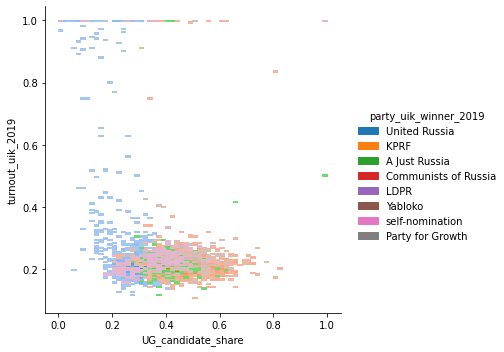

In [ ]:
import seaborn as sns
sns.displot(df_inner, x="UG_candidate_share", y='turnout_uik_2019', hue="party_uik_winner_2019" ); # , kind="kde"

## uik addresses


In [ ]:
uikaddresses = pd.read_excel('/content/drive/MyDrive/Term-paper/uik_addresses.xlsx')

In [ ]:
def preprocess_address(address):

    checkfor = ['улица', 'переулок', 'бульвар', 'шоссе', 'дом', 'корпус', 'посёлок', 'строение', 'квартал', 'посёлок городского типа', 'рабочий посёлок', 
                'село', 'линия', 'аллея', 'набережная', 'переулок', 'проезд', 'площадь', 'проспект', 'тупик', 'километр', 'микрорайон', 'город', 'район',
                'НП', 'СНТ', 'ТИЗ']

    def edit_address(part):
        for s in checkfor:
                if s in part:
                    if part.find(s) == 0:
                        part = part
                    else:
                        partnew = part.split(' ')
                        part = ' '.join(partnew[::-1])
        for i in range(1, 100):
            number_a = str(i) + '-я'
            number_b = str(i) + '-й'

            if number_a in part:
                number_a = number_a
                part = part.replace(number_a, '')
                part = part + '' + number_a
        
            if number_b in part:
                number_b = number_b
                part = part.replace(number_b, '')
                part = part + '' + number_b 
         
        return part
    
    addresses_list_new = []

    for addr in address.split(';'):
        addr_tolist = addr.split(', ')
        #print(addr_tolist)
        addr_new = ', '.join([edit_address(part) for part in addr_tolist])
        #print(addr_new)
        addresses_list_new.append(addr_new)
    
    return addresses_list_new

uikaddresses = uikaddresses[uikaddresses['PolIAddressesList'].notnull()]
uikaddresses['PolIAddressesList_prep'] = ''
uikaddresses['PolIAddressesList_prep'] = uikaddresses['PolIAddressesList'].apply(preprocess_address)

In [ ]:
uik_address_dict = dict(zip(uikaddresses.PollStationNumber, uikaddresses.PolIAddressesList_prep))

In [ ]:
address_dictionary = {}
for i in uik_address_dict:
    list_addresses = uik_address_dict.get(i)
    for address in list_addresses:
        address_key = i
        new_pair = {address:i}
        address_dictionary.update(new_pair)

len(address_dictionary)

57751

In [ ]:
uiks_houses = pd.DataFrame.from_dict(address_dictionary, orient='index').reset_index()
uiks_houses = uiks_houses.rename(columns={'index':'house_address', 0:'uik'})

## age of houses

In [ ]:
#houseage = pd.read_excel('/content/drive/MyDrive/Term-paper/house_age.xlsx')
houseage2 = pd.read_excel('/content/drive/MyDrive/Term-paper/house_age_2.xlsx')

In [ ]:
houseage2

,house_address,house_area_m2,house_year_building,house_levels
0,"город Троицк, улица Парковая, дом 7",597.90,1960,NaN
1,"город Троицк, улица Парковая, дом 8",576.60,1959,NaN
2,"город Троицк, улица Парковая, дом 9",905.50,1958,NaN
3,"город Троицк, улица Парковая, дом 10",1041.10,1962,NaN
4,"район Подольский, посёлок Секерино, дом 3,",388.71,1956,2.0
...,...,...,...,...
33853,"улица Мантулинская, дом 9, корпус 1,",NaN,NaN,NaN
33854,"набережная Котельническая, дом 21,",19800.10,2018,9.0
33855,"шоссе Дмитровское, дом 70",21243.10,2018,25.0
33856,"улица Лужская, дом 9,",78.40,1959,1.0


In [ ]:
data_houses2 = houseage2.merge(uiks_houses, how='left', left_on='house_address', right_on='house_address')

In [ ]:
data_houses_new = data_houses2[data_houses2['uik'].isnull() == False]
data_houses_new = data_houses_new[data_houses_new['house_year_building'].isnull() == False]
data_houses_new = data_houses_new[data_houses_new['house_area_m2'].isnull() == False]
data_houses_new = data_houses_new[data_houses_new['house_levels'].isnull() == False]
data_houses_new = data_houses_new[data_houses_new['house_year_building'] > 0]
data_houses_new = data_houses_new[data_houses_new['house_levels'] > 0]
data_houses_new = data_houses_new[data_houses_new['house_area_m2'] > 0]
data_houses_new['house_age'] = 2021 - data_houses_new['house_year_building']
#data_houses_new
data_houses_new[data_houses_new['uik'] == 1311]

,house_address,house_area_m2,house_year_building,house_levels,uik,house_age
5976,"проезд Ферганский, дом 7, корпус 1",13989.0,1969,9.0,1311.0,52
5978,"проезд Ферганский, дом 7, корпус 2",10466.0,1969,9.0,1311.0,52
5979,"проезд Ферганский, дом 7, корпус 3",14037.0,1969,9.0,1311.0,52
5981,"проезд Ферганский, дом 7, корпус 5",6269.0,1983,16.0,1311.0,38
5984,"проезд Ферганский, дом 9, корпус 1",5364.0,1976,16.0,1311.0,45


In [ ]:
data_houses_grouped = pd.to_numeric(data_houses_new['house_age']).groupby(data_houses_new['uik'])
data_houses_grouped_2 = pd.to_numeric(data_houses_new['house_levels']).groupby(data_houses_new['uik'])
data_houses_grouped_3 = pd.to_numeric(data_houses_new['house_area_m2']).groupby(data_houses_new['uik'])

data_houses_grouped = pd.DataFrame(data_houses_grouped.mean()).reset_index()
data_houses_grouped_2 = pd.DataFrame(data_houses_grouped_2.mean()).reset_index()
data_houses_grouped_3 = pd.DataFrame(data_houses_grouped_3.mean()).reset_index()

data_houses_grouped = data_houses_grouped.rename(columns={'house_age':'mean_house_age'})
data_houses_grouped_2 = data_houses_grouped_2.rename(columns={'house_levels':'mean_house_levels'})
data_houses_grouped_3 = data_houses_grouped_3.rename(columns={'house_area_m2':'mean_house_area_m2'})

In [ ]:
data_houses_grouped = data_houses_grouped.merge(data_houses_grouped_2, left_on='uik', right_on='uik')
data_houses_grouped = data_houses_grouped.merge(data_houses_grouped_3, left_on='uik', right_on='uik')

In [ ]:
datat = data_full.merge(data_houses_grouped, how='left', left_on='uik', right_on='uik')
datat.to_csv('data_uiks_houses.csv', sep=';')

## Control variables


In [ ]:
business_tik = pd.read_csv('/content/drive/MyDrive/Term-paper/Количество_малых_и_средних_предприятий.csv', header=0, names=['year', 'district', 'business_tik'])
business_tik = business_tik.drop('year', axis=1)

population_density_tik = pd.read_csv('/content/drive/MyDrive/Term-paper/Плотность_населения.csv', header=0, names=['year', 'district', 'population_density_tik'])
population_density_tik = population_density_tik.drop('year', axis=1)

education_tik = pd.read_csv('/content/drive/MyDrive/Term-paper/Процент_людей_с_высшим_образованием 2010.csv', header=0, names=['year', 'district', 'education_tik'])
education_tik = education_tik.drop('year', axis=1)

age_tik = pd.read_csv('/content/drive/MyDrive/Term-paper/Средний_возраст 2010.csv', header=0, names=['year', 'district', 'age_tik'])
age_tik = age_tik.drop('year', axis=1)

salary_tik = pd.read_csv('/content/drive/MyDrive/Term-paper/Количество_малых_и_средних_предприятий.csv', header=0, names=['year', 'district', 'salary_tik'])
salary_tik = salary_tik.drop('year', axis=1)

rent_price_tik = pd.read_csv('/content/drive/MyDrive/Term-paper/Стоимость_съема_квартиры_площадью_в_40_м².csv', header=0, names=['year', 'district', 'rent_price_tik'])
rent_price_tik = rent_price_tik[rent_price_tik['year'] == '2017']
rent_price_tik = rent_price_tik.drop('year', axis=1)

living_price_tik = pd.read_csv('/content/drive/MyDrive/Term-paper/Цена_за_квадратный_метр_жилья _медианная.csv', header=0, names=['year', 'district', 'living_price_tik'])
living_price_tik = living_price_tik[living_price_tik['year'] == '2017']
living_price_tik = living_price_tik.drop('year', axis=1)

population_tik = pd.read_csv('/content/drive/MyDrive/Term-paper/Численность_населения.csv', header=0, names=['year', 'district', 'population_tik'])
population_tik = population_tik[population_tik['year'] == '2017']
population_tik = population_tik.drop('year', axis=1)

In [ ]:
living_price_tik

,district,living_price_tik
0,Академический,212500.000000
1,Алексеевский,221304.426134
2,Алтуфьевский,132394.366197
3,Арбат,499923.571429
4,Аэропорт,221516.307692
...,...,...
141,Южное Тушино,165775.401070
142,Южнопортовый,192682.926829
143,Якиманка,490196.078431
144,Ярославский,139900.000000


In [ ]:
merged_df = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(business_tik,population_density_tik,on='district'),
                            education_tik,on='district'), 
                              age_tik, on='district'), salary_tik, on='district'), 
                              rent_price_tik, on='district'), living_price_tik, on='district'),
                              population_tik, on='district')

In [ ]:
merged_df['tik'] = merged_df['district'].map(MX_dict)

In [ ]:
merged_df[:15]

,district,business_tik,population_density_tik,education_tik,age_tik,salary_tik,rent_price_tik,living_price_tik,population_tik,tik
0,Академический,348.06,18736.02,44.98,40.5,348.06,35556.0,212500.000000,109200.0,101 Академический район
1,Алексеевский,485.14,15196.79,48.89,40.0,485.14,36842.0,221304.426134,80400.0,54 Алексеевский район
2,Алтуфьевский,184.29,17664.00,40.52,39.5,184.29,29990.0,132394.366197,57300.0,55 Алтуфьевский район
3,Арбат,1005.82,16838.39,65.85,44.1,1005.82,53659.0,499923.571429,35000.0,79 район Арбат
4,Аэропорт,474.90,17313.10,64.28,41.8,474.90,37209.0,221516.307692,79100.0,37 район Аэропорт
5,Бабушкинский,422.37,17415.38,47.98,42.8,422.37,31250.0,165277.777778,88200.0,56 Бабушкинский район
6,Басманный,1424.73,13159.62,59.09,41.0,1424.73,42105.0,272826.376005,110100.0,80 Басманный район
7,Беговой,714.64,7692.27,63.91,41.4,714.64,40000.0,233333.333333,42700.0,38 район Беговой
8,Бескудниковский,158.55,23930.61,36.55,43.1,158.55,28571.0,160029.896668,78400.0,39 Бескудниковский район
9,Бибирево,115.01,24814.42,35.55,39.7,115.01,30000.0,148076.923077,159900.0,57 район Бибирево


In [ ]:
merged_df['tik'][10] = '113 район Бирюлево Восточное'
merged_df['tik'][11] = '114 район Бирюлево Западное'
merged_df['tik'][25] = '133 Троицкий административный округ'
merged_df['tik'][91] = '132 Новомосковская'
merged_df['tik'][123] = '109 район Теплый Стан' 
merged_df['tik'][125] = '29 район Тропарево-Никулино'
merged_df['tik'][126] = '30 район Филевский парк'
merged_df['tik'][133] = '110 район Черемушки'

In [ ]:
data_with_controls = datat.merge(merged_df, how='left', left_on='tik', right_on='tik')

In [ ]:
tik_data_with_controls = data_full_tik.merge(merged_df, how='left', left_on='tik', right_on='tik')
tik_data_with_controls[:15]

,tik,turnout_tik_2014,winner_tik_2014,winner_share_tik,party_tik_winner_2014,winner_opposition_tik,winner_opposition_share_tik,party_tik_opposition,winner2nd_tik,winner2nd_share,party_tik_winner2nd,year_2014,winner_share,UG_candidate_votes,UG_candidate_share,UG_candidate,turnout_tik_2019,winner_tik_2019,party_tik_winner_2019,UG_tik_winner,year_2019,URussia_tik_2014,URussia_tik_2019,crime_total,crime_outside,crime_kill,crime_bodyharm,crime_theft,crime_burglary,crime_roberry,crime_videocameras,sfmeasures_privateguard,sfmeasures_cameras,sfmeasures_barrier,sfmeasures_fence,sfmeasures_patrol,sfmeasures_concierge,sfmeasures_none,house_cameras,house_irondoors,...,notenough_infrastructure_publicinternet,notenough_infrastructure_nothing,index,educ_extra_music,educ_extra_art,educ_extra_owndistrict,educ_extra_citycenter,educ_extra_none,educ_extra_otherdistricts,children_educextra_owndistrict,children_educextra_center,children_educextra_otherdistricts,satisfied_educ_preschool,satisfied_educ_school,satisfied_educ_extra,problem_education,problem_children_education,problem_education_level,problem_low_qualification,problem_children_injured,problem_russian_language_educ,problem_education_access,problem_education_timetable,problem_education_extrafees,problem_education_corruption,problem_education_furniture,problem_education_equipment,problem_education_noactivities,problem_education_tariffs,problem_education_none,AO,district,business_tik,population_density_tik,education_tik,age_tik,salary_tik,rent_price_tik,living_price_tik,population_tik
0,1 район Богородское,0.207845,молевантонильич,0.446269,self-nomination,молевантонильич,0.446269,self-nomination,молевантонильич,0.446269,self-nomination,2014,0.383482,5442,0.383482,тимоновмихаиллеонидович,0.223522,тимоновмихаиллеонидович,A Just Russia,1,2019,0,0,912.0,262.0,1.0,5.0,487.0,23.0,2.0,1292.0,0.02,0.36,0.02,0.03,0.09,0.07,0.51,0.34,0.68,...,0.06,0.27,Богородское,0,0,0.14,0.29,0.91,0.43,0.83,0.06,0.11,4.11,3.76,4.07,0.16,0.19,0.04,0.11,0.04,0.07,0.15,0.07,0.15,0.11,0.11,0.11,0.11,0.04,0.44,Восточный АО,Богородское,300.20,10557.71,35.92,41.9,300.20,33333.0,177419.354839,107900.0
1,10 район Новогиреево,0.217205,кругляковвиктормихайлович,0.492572,United Russia,лапинюрийерминингельдович,0.219177,KPRF,кругляковвиктормихайлович,0.492572,United Russia,2014,0.424700,4701,0.4247,шереметьеволегмихайлович,0.212267,шереметьеволегмихайлович,KPRF,1,2019,1,0,1312.0,NaN,0.0,8.0,655.0,28.0,5.0,1087.0,0.05,0.29,0.04,0.02,0.12,0.08,0.56,0.41,0.65,...,0.11,0.54,Новогиреево,0.02,0,0.22,0.22,0.88,0.11,0.62,0.23,0.23,3.87,3.65,4.25,0.1,0.19,0.16,0.23,0,0,0,0.06,0.1,0.06,0.1,0.06,0.06,0.1,0.55,Восточный АО,Новогиреево,187.35,22108.31,47.74,41.2,187.35,31579.0,158139.534884,97900.0
2,100 Южнопортовый район,0.216405,зотовазоямихайловна,0.517041,United Russia,тарасовпавелмихайлович,0.21532,KPRF,зотовазоямихайловна,0.517041,United Russia,2014,0.395713,3415,0.395713,тарасовпавелмихайлович,0.214556,тарасовпавелмихайлович,KPRF,1,2019,1,0,1708.0,NaN,NaN,12.0,NaN,16.0,4.0,800.0,0.02,0.35,0.02,0.01,0.22,0.04,0.47,0.39,0.78,...,0.05,0.3,Южнопортовый,0,0.02,0.17,0.5,0.93,0.33,0.8,0.1,0.3,3.95,3.84,4.13,0.14,0.14,0.1,0.14,0.03,0.03,0.1,0,0.21,0.03,0.03,0.07,0.1,0.07,0.45,Юго-Восточный АО,Южнопортовый,396.60,16418.54,44.04,41.3,396.60,36066.0,192682.926829,74200.0
3,101 Академический район,0.184993,губенкониколайниколаевич,0.306585,KPRF,губенкониколайниколаевич,0.306585,KPRF,губенкониколайниколаевич,0.306585,KPRF,2014,0.603246,6281,0.603246,губенкониколайниколаевич,0.192335,губенкониколайниколаевич,KPRF,1,2019,0,0,1195.0,278.0,5.0,4.0,673.0,27.0,12.0,1161.0,0.07,0.35,0.06,0.05,0.14,0.23,0.39,0.4,0.69,...,0.15,0.38,Академический,0.01,0,0.19,0.25,0.81,0.38,0.75,0.2,0.1,4.37,4.05,4.35,0.19,0.47,0.1,0.23,0,0.03,0.1,0.17,0.17,0.1,0.1,0.07,0.13,0.17,0.3,Юго-Западный АО,Академический,348.06,18736.02,44.98,40.5,348.06,35556.0,212500.000000,109200.0
4,102 Гагаринский район,0.221945,русаковаеленалеонидовна,0.364740,Yabloko,русаковаеленалеонидовна,

In [ ]:
data_with_controls['UG_supported_party'] = ''

for i in range(len(data_with_controls)):
    data_with_controls['UG_supported_party'][i] = party_dict_1.get(data_with_controls['UG_candidate'][i]) 

data_with_controls[['UG_supported_party', 'UG_candidate', 'party_uik_winner_2019', 'UG_uik_winner']][20:30]

dummy_party = pd.get_dummies(data_with_controls['UG_supported_party'])
data_with_controls = pd.concat([data_with_controls, dummy_party], axis=1)
data_with_controls

In [ ]:
data_with_controls.to_csv('fullest_data_with_controls_2.csv', sep=';')

In [ ]:
tik_data_with_controls['UG_supported_party'] = ''

for i in range(len(tik_data_with_controls)):
    tik_data_with_controls['UG_supported_party'][i] = party_dict_1.get(tik_data_with_controls['UG_candidate'][i]) 

tik_data_with_controls[['UG_supported_party', 'UG_candidate', 'party_tik_winner_2019', 'UG_tik_winner']][20:30]

dummy_party = pd.get_dummies(tik_data_with_controls['UG_supported_party'])
tik_data_with_controls = pd.concat([tik_data_with_controls, dummy_party], axis=1)

In [ ]:
tik_data_with_controls.to_csv('tik_data_with_controls_2.csv', sep=';')

In [ ]:
tik_data_with_controls

,tik,turnout_tik_2014,winner_tik_2014,winner_share_tik,party_tik_winner_2014,winner_opposition_tik,winner_opposition_share_tik,party_tik_opposition,winner2nd_tik,winner2nd_share,party_tik_winner2nd,year_2014,winner_share,UG_candidate_votes,UG_candidate_share,UG_candidate,turnout_tik_2019,winner_tik_2019,party_tik_winner_2019,UG_tik_winner,year_2019,URussia_tik_2014,URussia_tik_2019,crime_total,crime_outside,crime_kill,crime_bodyharm,crime_theft,crime_burglary,crime_roberry,crime_videocameras,sfmeasures_privateguard,sfmeasures_cameras,sfmeasures_barrier,sfmeasures_fence,sfmeasures_patrol,sfmeasures_concierge,sfmeasures_none,house_cameras,house_irondoors,...,notenough_infrastructure_publicinternet,notenough_infrastructure_nothing,index,educ_extra_music,educ_extra_art,educ_extra_owndistrict,educ_extra_citycenter,educ_extra_none,educ_extra_otherdistricts,children_educextra_owndistrict,children_educextra_center,children_educextra_otherdistricts,satisfied_educ_preschool,satisfied_educ_school,satisfied_educ_extra,problem_education,problem_children_education,problem_education_level,problem_low_qualification,problem_children_injured,problem_russian_language_educ,problem_education_access,problem_education_timetable,problem_education_extrafees,problem_education_corruption,problem_education_furniture,problem_education_equipment,problem_education_noactivities,problem_education_tariffs,problem_education_none,AO,district,business_tik,population_density_tik,education_tik,age_tik,salary_tik,rent_price_tik,living_price_tik,population_tik
0,1 район Богородское,0.207845,молевантонильич,0.446269,self-nomination,молевантонильич,0.446269,self-nomination,молевантонильич,0.446269,self-nomination,2014,0.383482,5442,0.383482,тимоновмихаиллеонидович,0.223522,тимоновмихаиллеонидович,A Just Russia,1,2019,0,0,912.0,262.0,1.0,5.0,487.0,23.0,2.0,1292.0,0.02,0.36,0.02,0.03,0.09,0.07,0.51,0.34,0.68,...,0.06,0.27,Богородское,0,0,0.14,0.29,0.91,0.43,0.83,0.06,0.11,4.11,3.76,4.07,0.16,0.19,0.04,0.11,0.04,0.07,0.15,0.07,0.15,0.11,0.11,0.11,0.11,0.04,0.44,Восточный АО,Богородское,300.20,10557.71,35.92,41.9,300.20,33333.0,177419.354839,107900.0
1,10 район Новогиреево,0.217205,кругляковвиктормихайлович,0.492572,United Russia,лапинюрийерминингельдович,0.219177,KPRF,кругляковвиктормихайлович,0.492572,United Russia,2014,0.424700,4701,0.4247,шереметьеволегмихайлович,0.212267,шереметьеволегмихайлович,KPRF,1,2019,1,0,1312.0,NaN,0.0,8.0,655.0,28.0,5.0,1087.0,0.05,0.29,0.04,0.02,0.12,0.08,0.56,0.41,0.65,...,0.11,0.54,Новогиреево,0.02,0,0.22,0.22,0.88,0.11,0.62,0.23,0.23,3.87,3.65,4.25,0.1,0.19,0.16,0.23,0,0,0,0.06,0.1,0.06,0.1,0.06,0.06,0.1,0.55,Восточный АО,Новогиреево,187.35,22108.31,47.74,41.2,187.35,31579.0,158139.534884,97900.0
2,100 Южнопортовый район,0.216405,зотовазоямихайловна,0.517041,United Russia,тарасовпавелмихайлович,0.21532,KPRF,зотовазоямихайловна,0.517041,United Russia,2014,0.395713,3415,0.395713,тарасовпавелмихайлович,0.214556,тарасовпавелмихайлович,KPRF,1,2019,1,0,1708.0,NaN,NaN,12.0,NaN,16.0,4.0,800.0,0.02,0.35,0.02,0.01,0.22,0.04,0.47,0.39,0.78,...,0.05,0.3,Южнопортовый,0,0.02,0.17,0.5,0.93,0.33,0.8,0.1,0.3,3.95,3.84,4.13,0.14,0.14,0.1,0.14,0.03,0.03,0.1,0,0.21,0.03,0.03,0.07,0.1,0.07,0.45,Юго-Восточный АО,Южнопортовый,396.60,16418.54,44.04,41.3,396.60,36066.0,192682.926829,74200.0
3,101 Академический район,0.184993,губенкониколайниколаевич,0.306585,KPRF,губенкониколайниколаевич,0.306585,KPRF,губенкониколайниколаевич,0.306585,KPRF,2014,0.603246,6281,0.603246,губенкониколайниколаевич,0.192335,губенкониколайниколаевич,KPRF,1,2019,0,0,1195.0,278.0,5.0,4.0,673.0,27.0,12.0,1161.0,0.07,0.35,0.06,0.05,0.14,0.23,0.39,0.4,0.69,...,0.15,0.38,Академический,0.01,0,0.19,0.25,0.81,0.38,0.75,0.2,0.1,4.37,4.05,4.35,0.19,0.47,0.1,0.23,0,0.03,0.1,0.17,0.17,0.1,0.1,0.07,0.13,0.17,0.3,Юго-Западный АО,Академический,348.06,18736.02,44.98,40.5,348.06,35556.0,212500.000000,109200.0
4,102 Гагаринский район,0.221945,русаковаеленалеонидовна,0.364740,Yabloko,русаковаеленалеонидовна,